In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [3]:
iris_dataset = datasets.load_iris()

In [4]:
print(iris_dataset.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
features = dict()
for i, feature_name in enumerate(iris_dataset.feature_names):
    features[feature_name] = iris_dataset.data[:, i]
features['class'] = [iris_dataset.target_names[t] for t in iris_dataset.target]

In [6]:
iris_df = pd.DataFrame(data = features)
iris_df.head()

,class,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


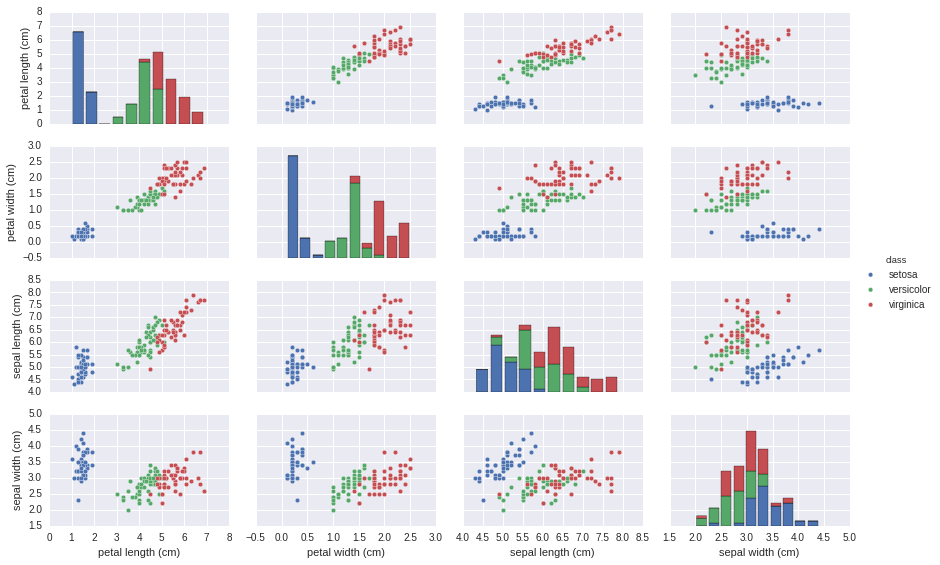

In [7]:
sns.set(font_scale=1)
sns.pairplot(iris_df, hue='class', size=2, aspect=1.5)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import LeaveOneOut, cross_val_score
from sklearn.metrics import log_loss
import numpy as np

loo = LeaveOneOut(len(iris_df.dropna()))

X = iris_df.dropna().drop(['class'], axis=1).values
y = LabelEncoder().fit_transform(iris_df.dropna()['class'])

# X_scaled = StandardScaler().fit_transform(X)
X_scaled = X
max_k = 40
scores = np.zeros(max_k)
scores1 = np.zeros(max_k)

for k in range(1, max_k + 1):
    cls = KNeighborsClassifier(k)
    cls.fit(X_scaled, y)
    scores1[k-1] = cls.score(X_scaled, y)
    scores[k - 1] = cross_val_score(cls, X_scaled, y, cv=loo).mean()
    


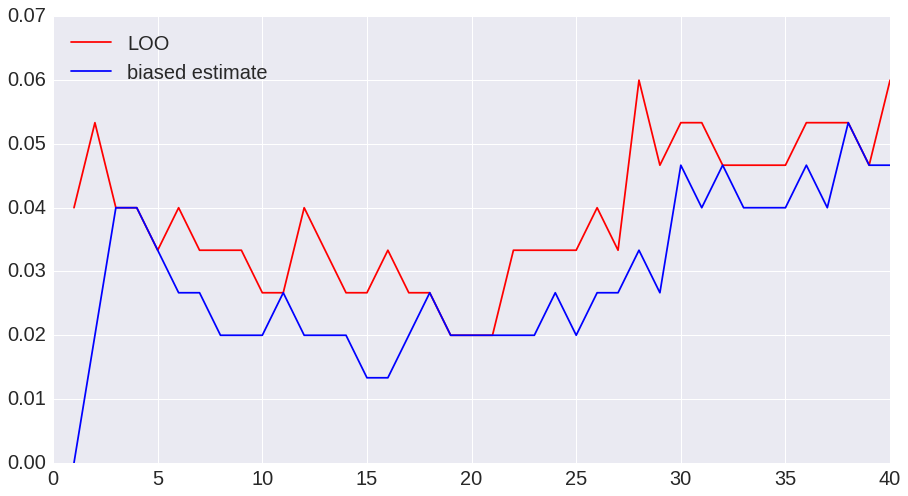

In [43]:
plt.figure(figsize=(15,8))
sns.set(font_scale=2)
plt.plot(range(1, max_k + 1), 1 - scores, c='red', label='LOO')
plt.plot(range(1, max_k + 1), 1 - scores1, c='blue', label='biased estimate')
plt.legend(loc=2)
plt.savefig('iris_knn_loo.pdf')